In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [4]:
#Zadanie1
def our_integrate(y, dx, method = "trapezoidal"):
    #method: trapezoidal, simpson_13, simpson_38
    partial_sums = np.zeros(len(y))
    if method == "trapezoidal":
        partial_sums = 0
        for i in range(len(y)-1):
            partial_sums += ((y[i]+y[i+1])*dx)/2
        return partial_sums
    if method == "simpson_13":
        partial_sums = 0
        if len(y) % 2 == 1:
            for i in range(0, len(y)-4, 2):
                partial_sums += ((y[i]+4*y[i+1]+y[i+2])*dx)/3
            partial_sums += (y[len(y)-4]+3*y[len(y)-3]+3*y[len(y)-2]+y[len(y)-1])*3*dx/8
        if len(y) % 2 == 0:
            for i in range(0, len(y)-2, 2):
                partial_sums  += ((y[i]+4*y[i+1]+y[i+2])*dx)/3
        return partial_sums
    if method == "simpson_38":
        partial_sums = 0
        for i in range(0, len(y)-3, 3):
            partial_sums += (y[i]+3*y[i+1]+3*y[i+2]+y[i+3])*3*dx/8
        return partial_sums

    
start = 0
stop = np.pi
step = 0.001
samples = int((stop-start)/step)
x = np.linspace(start, stop, samples)
y = np.sin(x)
print(our_integrate(y, step))
print(our_integrate(y, step, "simpson_13"))
print(our_integrate(y, step, "simpson_38"))


b_t = time.time()
result_trapezoidal_1 = integrate.trapz(y, dx = step)
e_t = time.time()
print("Result trapezoidal_1: ", result_trapezoidal_1)
print("Elapsed time: ", e_t - b_t)

b_t = time.time()
result_trapezoidal_1 = our_integrate(y, step)
e_t = time.time()
print("Result our trapezoidal: ", result_trapezoidal_1)
print("Elapsed time: ", e_t - b_t)

b_t = time.time()
result_trapezoidal_1 = our_integrate(y, step, "simpson_38")
e_t = time.time()
print("Result our simpson38: ", result_trapezoidal_1)
print("Elapsed time: ", e_t - b_t)

1.9989859184830032
1.9989885864995398
1.998984084220469
Result trapezoidal_1:  1.9989859184830006
Elapsed time:  0.0
Result our trapezoidal:  1.9989859184830032
Elapsed time:  0.0039980411529541016
Result our simpson38:  1.998984084220469
Elapsed time:  0.003997087478637695


In [126]:
#Zadanie 2
start = 0
stop = 3
samples = 513 #do rekurencyjnej uzywam liczby przedziałów w postaci 2^(k-1). 513 liczb generuje 512 przedziałów, k = 10
step = (stop-start)/samples
x = np.linspace(start, stop, samples)
y = x**2
def our_cumsum(X):
    total_sum = 0
    for i in X:
        total_sum = total_sum + i
        yield total_sum
def integrate_recursive(y, l_prz, step):
    h = (len(y)*step)/l_prz
    if l_prz>1:
        #print("liczba przedzialow: ", l_prz, "h: ", h)
        suma = 0 
        for i in range(0, int(l_prz/2)):
            suma += y[int((2*i-1)*h/step)]
        return h*suma + integrate_recursive(y, l_prz/2, step)/2
    else:
        #print("liczba przedzialow: ", l_prz, "h: ", h)
        return (y[0] + y[len(y)-1])*h/2
print(integrate_recursive(y, samples-1, step))


9.001667328178883


(9.869604401089356, 1.0957462050031181e-13)
9.765518015928011


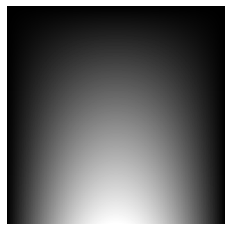

In [190]:
#Zadanie 3

step = 0.01
start = 0
stop = np.pi
samples = int((stop - start) / step)
x = np.linspace(start, stop, samples)
y = np.linspace(start, stop, samples)

xs, ys = np.meshgrid(x, y)
zs = np.sin(xs)*ys
grad_y, grad_x = np.gradient(zs)


plt.figure()
plt.imshow(zs, cmap='gray')
plt.axis('off')



def our_double_integral(X, step):
    #X rozumiane jako f: R^2 -> R
    suma = 0
    for i in range(len(X[:, 0])-1):
        for j in range(len(X[0, :])-1):
            suma += (X[i, j]+X[i, j+1])*step*step/2
    return suma
print(integrate.dblquad(lambda y, x: np.sin(x)*y, 0, np.pi, 0, np.pi))
print(our_double_integral(zs, step))


SyntaxError: invalid syntax (<ipython-input-188-026968384959>, line 1)